# CS 533 Assignment 2
## Introduction
The basic outlines of this assignment are:
* Getting data and processing them into required format
* Visualizing information
* Inferring conclusions form the data

## Environment Setup

We will be using pandas and numpy for data processing and manipulation, Scipy for testing hypothesis and inferring results and seaborn and matplotlib to visualize distributions and results.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import seaborn as sns
import matplotlib.pyplot as plt

## Data
The data we will be using for this assignment is [**HETREC**](https://grouplens.org/datasets/hetrec-2011/) [**Movie Data**](https://files.grouplens.org/datasets/hetrec2011/hetrec2011-movielens-2k-v2.zip) from MovieLens, IMDb and Rotten Tomatoes. This dataset is an extension of MovieLens10M dataset, published by GroupLens research group. It links the movies of MovieLens dataset with their corresponding web pages at [Internet Movie Database](http://www.imdb.com ) (IMDb) and [Rotten Tomatoes](http://www.rottentomatoes.com) movie review systems.

The most used files in this assignment will be the Movies file, User-Movie rating file, and Movie-Genre file. The columns we will be using for this assignment are:
1. rtAllCriticsRating
2. rtTopCriticsRating
3. rtAudienceRating
4. movie lens average rating
5. count of movie lens user rating

For movie rating values, 0 rating score can be considered as a missing value. So, replacing 0 from the rating column with np.NaN as required. Sample code is shown below.
```
movies.loc[movies["rtAllCriticsRating"] == 0, "rtAllCriticsRating"] = np.nan
movies.loc[movies["rtTopCriticsRating"] == 0, "rtTopCriticsRating"] = np.nan
```

In [2]:
movies = pd.read_csv("hetrec2011-movielens-2k-v2/movies.dat", delimiter="\t", encoding="latin1", na_values=["\\N"])
movies.set_index("id", inplace=True)
movies.head()


,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
id,,,,,,,,,,,,,,,,,,,,
1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9.0,73.0,73.0,0.0,100.0,8.5,17.0,17.0,0.0,100.0,3.7,102338.0,81.0,http://content7.flixster.com/movie/10/93/63/10...
2,Jumanji,113497,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,1068044-jumanji,5.6,28.0,13.0,15.0,46.0,5.8,5.0,2.0,3.0,40.0,3.2,44587.0,61.0,http://content8.flixster.com/movie/56/79/73/56...
3,Grumpy Old Men,107050,Dos viejos gruï¿½ones,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,grumpy_old_men,5.9,36.0,24.0,12.0,66.0,7.0,6.0,5.0,1.0,83.0,3.2,10489.0,66.0,http://content6.flixster.com/movie/25/60/25602...
4,Waiting to Exhale,114885,Esperando un respiro,http://ia.media-imdb.com/images/M/MV5BMTczMTMy...,1995,waiting_to_exhale,5.6,25.0,14.0,11.0,56.0,5.5,11.0,5.0,6.0,45.0,3.3,5666.0,79.0,http://content9.flixster.com/movie/10/94/17/10...
5,Father of the Bride Part II,113041,Vuelve el padre de la novia (Ahora tambiï¿½n a...,http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...,1995,father_of_the_bride_part_ii,5.3,19.0,9.0,10.0,47.0,5.4,5.0,1.0,4.0,20.0,3.0,13761.0,64.0,http://content8.flixster.com/movie/25/54/25542...


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10197 entries, 1 to 65133
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   10197 non-null  object 
 1   imdbID                  10197 non-null  int64  
 2   spanishTitle            10197 non-null  object 
 3   imdbPictureURL          10016 non-null  object 
 4   year                    10197 non-null  int64  
 5   rtID                    9886 non-null   object 
 6   rtAllCriticsRating      9967 non-null   float64
 7   rtAllCriticsNumReviews  9967 non-null   float64
 8   rtAllCriticsNumFresh    9967 non-null   float64
 9   rtAllCriticsNumRotten   9967 non-null   float64
 10  rtAllCriticsScore       9967 non-null   float64
 11  rtTopCriticsRating      9967 non-null   float64
 12  rtTopCriticsNumReviews  9967 non-null   float64
 13  rtTopCriticsNumFresh    9967 non-null   float64
 14  rtTopCriticsNumRotten   9967 non-null 

The movies.dat data set has 10197 movies and 20 variables.  Among 10197, only 9967 are rated. Thus we might have some missing data that needs to be handled.

In [4]:
ratings = pd.read_table("hetrec2011-movielens-2k-v2/user_ratedmovies-timestamps.dat",  delimiter="\t", encoding="latin1", na_values=["\\N"])
ratings.head()

,userID,movieID,rating,timestamp
0,75,3,1.0,1162160236000
1,75,32,4.5,1162160624000
2,75,110,4.0,1162161008000
3,75,160,2.0,1162160212000
4,75,163,4.0,1162160970000


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855598 entries, 0 to 855597
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userID     855598 non-null  int64  
 1   movieID    855598 non-null  int64  
 2   rating     855598 non-null  float64
 3   timestamp  855598 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 26.1 MB


The user_ratedmovies-timestamps.dat file has 855598  rows and 4 variables. This file contains the ratings of the movies provided by each particular user. It also includes the timestamps when the ratings were provided.

In [6]:
genres = pd.read_table("hetrec2011-movielens-2k-v2/movie_genres.dat",  delimiter="\t", encoding="latin1", na_values=["\\N"])
genres.head()

,movieID,genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


In [7]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20809 entries, 0 to 20808
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieID  20809 non-null  int64 
 1   genre    20809 non-null  object
dtypes: int64(1), object(1)
memory usage: 325.3+ KB


The movie_genre.dat file has 20809   rows and 2 variables. This file contains the genres of the movies.

## Analysis

### 1. Comparing Ratings

#### Distribution of Rotten Tomatoes Critic Rating and Mean rating by user from Movie Lense

As you can see that rtAllCriticsRating has a min value of zero. zero rating value doesn't make sense so this can be replaced by np.NaN. Similar for other mentioned ratings too.

##### All Critics Rating

In [8]:
movies.loc[movies["rtAllCriticsRating"] == 0, "rtAllCriticsRating"] = np.nan
movies["rtAllCriticsRating"].describe()

count    8441.000000
mean        6.068404
std         1.526898
min         1.200000
25%         5.000000
50%         6.200000
75%         7.200000
max         9.600000
Name: rtAllCriticsRating, dtype: float64

Mean is 6.07 and median is 6.20. The distribution is slightly skewed.

Text(0.5, 1.0, 'Distribution of All Critics Rating')

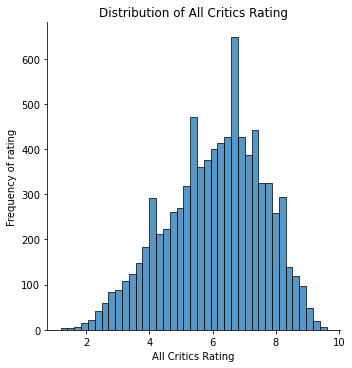

In [9]:
sns.displot(movies["rtAllCriticsRating"])
plt.xlabel("All Critics Rating")
plt.ylabel("Frequency of rating")
plt.title("Distribution of All Critics Rating")

The distribution is slightly left skewed.

##### Top Critics Rating

In [10]:
movies.loc[movies["rtTopCriticsRating"] == 0, "rtTopCriticsRating"] = np.nan
movies["rtTopCriticsRating"].describe()

count    4662.000000
mean        5.930330
std         1.534093
min         1.600000
25%         4.800000
50%         6.100000
75%         7.100000
max        10.000000
Name: rtTopCriticsRating, dtype: float64

The mean is 5.93 and the median is 6.1. There is a slight skew in the distribution.

Text(0.5, 1.0, 'Distribution of Top Critics Rating')

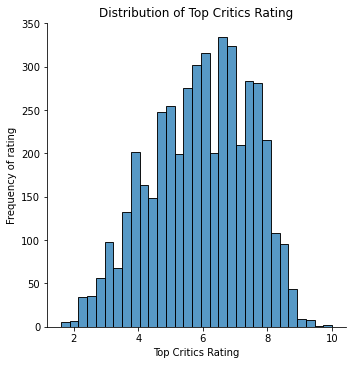

In [11]:
sns.displot(movies["rtTopCriticsRating"])
plt.xlabel("Top Critics Rating")
plt.ylabel("Frequency of rating")
plt.title("Distribution of Top Critics Rating")

A slight left skew can be seen in the distribution.

##### Audience Rating

In [12]:
movies.loc[movies["rtAudienceRating"] == 0, "rtAudienceRating"] = np.nan
movies["rtAudienceRating"].describe()

count    7345.000000
mean        3.389258
std         0.454034
min         1.500000
25%         3.100000
50%         3.400000
75%         3.700000
max         5.000000
Name: rtAudienceRating, dtype: float64

The mean is 3.39 and the median is 3.4. Both value are almost similar and indicates almost no skewness.

Text(0.5, 1.0, 'Distribution of Audience Rating')

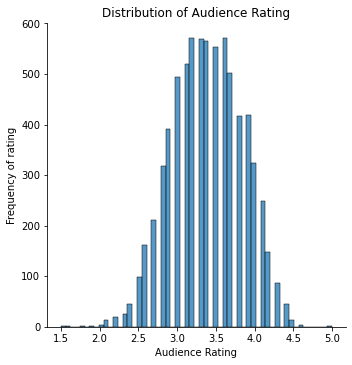

In [13]:
sns.displot(movies["rtAudienceRating"])
plt.xlabel("Audience Rating")
plt.ylabel("Frequency of rating")
plt.title("Distribution of Audience Rating")

The distribution is almost symmetrical or normal.

##### MovieLens Average User Rating

In [14]:
movie_stats = ratings.groupby("movieID")["rating"].agg(["count", "mean"]).rename(columns={
    "count": "mlNumRatings",
    "mean": "mlAvgRating"
})
movie_info = movies.join(movie_stats)
movie_info["mlNumRatings"].fillna(0, inplace=True)
movie_info.loc[movie_info["mlAvgRating"] == 0, "mlAvgRating"] = np.nan
movie_info["mlAvgRating"].describe()

count    10109.000000
mean         3.213406
std          0.640538
min          0.500000
25%          2.851293
50%          3.312415
75%          3.681452
max          5.000000
Name: mlAvgRating, dtype: float64

The mean is 3.21 and the median is 3.31 indicating a skewed distribution.

Text(0.5, 1.0, 'Distribution of Movie Lens Average User Rating')

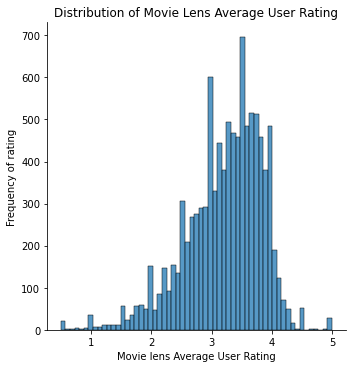

In [15]:
sns.displot(movie_info["mlAvgRating"])
plt.xlabel("Movie lens Average User Rating")
plt.ylabel("Frequency of rating")
plt.title("Distribution of Movie Lens Average User Rating")

The distribution is left skewed.

#### Distribution of Rating difference of All critics and Top Critics ratings

In [16]:
movies["all_top_diff"] = movies["rtAllCriticsRating"] - movies["rtTopCriticsRating"]
movies["all_top_diff"].describe()

count    4662.000000
mean        0.094123
std         0.549673
min        -2.200000
25%        -0.200000
50%         0.100000
75%         0.400000
max         3.200000
Name: all_top_diff, dtype: float64

The value of mean and median is almost same indicating no skewness or a symmetrical distribution.

Text(0.5, 1.0, 'Distribution of Difference in All and Top Critic rating')

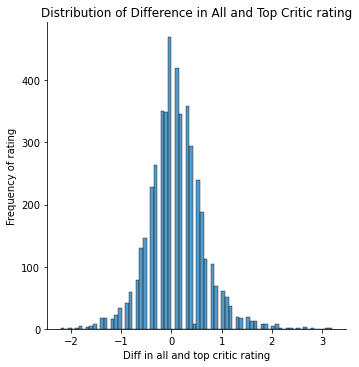

In [17]:
sns.displot(movies["all_top_diff"])
plt.xlabel("Diff in all and top critic rating")
plt.ylabel("Frequency of rating")
plt.title("Distribution of Difference in All and Top Critic rating")

Mean and Median of difference between All Critics Rating and Top Critics rating is almost equal and the distribution is not skewed. For most of the movies, both has similar values but there are movies with different ratings too.

#### Paired T-tests

1. Do the data indicate a difference between the ratings given to movies by all critics and those given by top critics?
2. Do the data indicate a difference between the average audience rating RottenTomatoes users give to a movie and the mean rating MovieLens users give to it?


In [18]:
sps.ttest_rel(movies["rtAllCriticsRating"], movies["rtTopCriticsRating"], nan_policy="omit")

Ttest_relResult(statistic=11.691646881769836, pvalue=3.8130588929989856e-31)

The p value is less than 0.05. We reject the Null Hypothesis. There is a significant difference between All critic rating and Top critic rating.

In [19]:
sps.ttest_rel(movie_info["rtAudienceRating"], movie_info["mlAvgRating"], nan_policy="omit")


Ttest_relResult(statistic=27.766895811705442, pvalue=2.038842597476695e-161)

The p value is less than 0.05. We reject the Null Hypothesis. There is a significant difference between Rotten Tomatoes Audience rating and Movie lens User rating.


Paired T-tests is relatable because we are comparing two variables from the same sample i.e. two attribute of the same movies.




### 2. Confidence Interval

In [20]:
rng = np.random.default_rng(20200913)

def mean_estimate(values):
    obs = values.dropna() 
    mean = obs.mean()
    se = obs.sem()
    ci_width = 1.96 * se
    if obs.count() == 0:
        return
    return pd.Series({
        "mean": mean,
        "std": obs.std(),
        "count": obs.count(),
        "se": obs.sem(),
        "ci_width": ci_width,
        "ci_min": mean - ci_width,
        "ci_max": mean + ci_width
    })

def boot_mean_estimate(values, nboot=10000):
    obs = values.dropna() 
    mean = np.mean(obs)
    n = obs.count()
    if n == 0:
        return
    boot_means = [np.mean(rng.choice(obs, size=n)) for i in range(nboot)]
    ci_low, ci_high = np.quantile(boot_means, [0.025, 0.975])
    return pd.Series({
        "mean": mean,
        "count": n,
        "ci_low": ci_low,
        "ci_high": ci_high
    })

#### Standard Error Method

In [21]:
movies_genre = genres.join(movie_info, on="movieID")
movies_by_genre = movies_genre.groupby(["genre"])
movies_by_genre["rtAllCriticsRating"].apply(mean_estimate).unstack().sort_values("mean", ascending=False)


,mean,std,count,se,ci_width,ci_min,ci_max
genre,,,,,,,
Film-Noir,7.253543,1.273527,127.0,0.113007,0.221494,7.032049,7.475038
Documentary,7.129641,0.979147,334.0,0.053577,0.105010,7.024631,7.234651
IMAX,6.950000,0.747440,16.0,0.186860,0.366246,6.583754,7.316246
War,6.753351,1.354775,388.0,0.068778,0.134805,6.618545,6.888156
Western,6.613472,1.394007,193.0,0.100343,0.196672,6.416800,6.810143
Musical,6.483573,1.319328,347.0,0.070825,0.138817,6.344756,6.622391
Drama,6.462657,1.337138,4306.0,0.020377,0.039939,6.422718,6.502596
Animation,6.343404,1.393417,235.0,0.090897,0.178157,6.165247,6.521561
Mystery,6.228571,1.488513,434.0,0.071451,0.140044,6.088528,6.368615


Does it look like the top two genres have different mean critic ratings? Does it look like the top and bottom genres have different mean critic ratings? Defend your answers using the confidence intervals.

The top two genres are Flim-Noir and Documentry. The sample means from the above data for Film-Noir is 7.25 and Documentary is 7.12 which is different. But the confidence interval for these two genres overlaps. As the CI interval of the two genre overlaps, there is a chance that the actual mean of these two genre can be same some times. 

The top and bottom genre is Film-Noir with the sample mean 7.25 and Horror with the sample mean 5.47. The confidence interval of these 2 genre are far apart and it can be said that the actual mean of these 2 genre will be different most of the time.


#### Bootstraping

In [22]:
movies_by_genre["rtAllCriticsRating"].apply(boot_mean_estimate).unstack().sort_values("mean", ascending=False)

,mean,count,ci_low,ci_high
genre,,,,
Film-Noir,7.253543,127.0,7.029921,7.467717
Documentary,7.129641,334.0,7.020951,7.235030
IMAX,6.950000,16.0,6.606250,7.306250
War,6.753351,388.0,6.618557,6.887113
Western,6.613472,193.0,6.412435,6.805699
Musical,6.483573,347.0,6.345814,6.621909
Drama,6.462657,4306.0,6.422734,6.502323
Animation,6.343404,235.0,6.167660,6.519574
Mystery,6.228571,434.0,6.088249,6.367972


Does this look the same as the standard error CIs?

This CI looks almost similar to that of Standard Errors CI with very small differences in value that will get ingored if we round the value to 2 or 3 decimal places.



### 3. Popularity and Bootstraps

In [23]:
def boot_ind_median(s1, s2, nboot=10000):
    obs1 = s1.dropna()
    obs2 = s2.dropna()
    n1 = len(obs1)
    n2 = len(obs2)
    pool = pd.concat([obs1, obs2])
    md = np.median(obs1) - np.median(obs2)
    
    b1 = np.array([np.median(rng.choice(pool, size=n1)) for i in range(nboot)])
    b2 = np.array([np.median(rng.choice(pool, size=n2)) for i in range(nboot)])
    
    return md, np.mean(np.abs(b1 - b2) >= np.abs(md))

def boot_ind_mean(s1, s2, nboot=10000):
    obs1 = s1.dropna()
    obs2 = s2.dropna()
    n1 = len(obs1)
    n2 = len(obs2)
    pool = pd.concat([obs1, obs2])
    md = np.mean(obs1) - np.mean(obs2)
    
    b1 = np.array([np.mean(rng.choice(pool, size=n1)) for i in range(nboot)])
    b2 = np.array([np.mean(rng.choice(pool, size=n2)) for i in range(nboot)])
    
    return md, np.mean(np.abs(b1 - b2) >= np.abs(md))


movies_info_genre = genres.join(movie_info, on="movieID")
action = movies_info_genre[movies_info_genre["genre"] == "Action"]
documentary = movies_info_genre[movies_info_genre["genre"] == "Documentary"]
boot_ind_median(action["mlNumRatings"], documentary["mlNumRatings"])

(45.0, 0.0)

In [24]:
action["mlNumRatings"].median()

56.0

In [25]:
documentary["mlNumRatings"].median()

11.0

The p values is less than 0.05. We reject the null hypothesis that  action and documentary movies have same median number of ratings. The median number of ratings for action movie is 56 and for documentary is 11.

In [26]:
action = movies_info_genre[movies_info_genre["genre"] == "Action"]
documentary = movies_info_genre[movies_info_genre["genre"] == "Documentary"]
boot_ind_median(action["rtAudienceNumRatings"], documentary["rtAudienceNumRatings"])

(4866.0, 0.0)

In [27]:
action["rtAudienceNumRatings"].median()

5353.0

In [28]:
documentary["rtAudienceNumRatings"].median()

487.0

The p values is less than 0.05. We reject the null hypothesis that  action and documentary movies have same median number of ratings. The median number of ratings for action movie is 5353 and for documentary is 487.

In [29]:
boot_ind_mean(action["rtAllCriticsRating"], documentary["rtAllCriticsRating"])

(-1.5551440742675675, 0.0)

In [30]:
sps.ttest_ind(action["rtAllCriticsRating"], documentary["rtAllCriticsRating"], nan_policy="omit", equal_var=False)

Ttest_indResult(statistic=-22.185618813162428, pvalue=1.748825424429425e-86)

In [31]:
action["rtAllCriticsRating"].describe()

count    1192.000000
mean        5.574497
std         1.560583
min         1.400000
25%         4.400000
50%         5.600000
75%         6.725000
max         9.200000
Name: rtAllCriticsRating, dtype: float64

In [32]:
documentary["rtAllCriticsRating"].describe()

count    334.000000
mean       7.129641
std        0.979147
min        2.600000
25%        6.600000
50%        7.300000
75%        7.800000
max        9.100000
Name: rtAllCriticsRating, dtype: float64

The p values is less than 0.05. We reject the null hypothesis that  action and documentary movies have same mean All Critics ratings.

## Reflection
Write 2 paragraphs about what you have learned through this assignment.

The primary purpose of this assignment was to learn about getting the data, processing and formatting them, visualizing the information, and inferring conclusions. The data set used for this assignment was HETREC Movie Data that contains movies and the ratings and scores provided by critics and audiences from IMDB and Rotten Tomatoes. It links these data with the MovieLens data set. 

The first thing we learned from this assignment is about the data. Usually, the data set will contain separate files that hold information, and these data need to be joined or merged to get the complete report. The value that the variables hold has a different meaning.  A zero in the number of ratings might have a sense, but the same zero in rating value has no meaning. So before using data for calculation and inference, it must be preprocessed.  Handling missing data is very much crucial as it might lead to a misleading result. The other thing we learned is about the different types of T-test, such as One-sample  T-test, Two-sample T-tests, and Paired T-tests for testing hypotheses. These T-tests are crucial for inferring the information about the whole population given a sample population. Also, the how to use and when to use the tests. We learned about Confidence Interval that a certain percent of the time, with sampling and computational procedures, the interval computed will hold the actual mean value. We learned about Bootstrapping mechanism, i.e., resampling a sample to save repetitive and expensive sampling from the existing population.  